# Setup (10 minutes)

Spend the first 10 minutes for the setup to:

1. Replace CID in the file name with your CID, e.g. 123456_Coursework2_Part2.ipynb
2. Read and execute the following sections:
- **[S1](#s1). Package Imports** <a name="index-s1"></a>
- **[S2](#s2). Queries on Documentation** <a name="index-s2"></a>
- **[S3](#s3). Dataset Loading** <a name="index-s3"></a>
3. Start to search and open lecture notes and notebooks that you will need to complete the tasks.

<a name="s1"></a>

## S1. Package Imports [(index)](#index-s1)

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt
from heapq import heappush, heappop, heapify
from tqdm import tqdm

# we define a mix of fontsizes, for different parts of a plot
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

# example of how you can use these fontsizes to set a global configuration for matplotlib;
# you should assign them based on the specific appearance of the figures you are producing
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<a name="s2"></a>

## S2. Queries on Documentation [(index)](#index-s2)

Documentation of common Python libraries (*e.g.*, np.linalg.eig) can be accessed locally by executing the following expression in an arbitrary cell.

In [2]:
# Example: to get the documentation of `np.linalg.eig` function for Eigen decomposition.
# Press the [x] button to close the documentation dialogue.

?np.linalg.eig

Signature:       np.linalg.eig(a)
Call signature:  np.linalg.eig(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function eig at 0x000001918B788C20>
File:            c:\users\photonuser\appdata\roaming\python\python311\site-packages\numpy\linalg\_linalg.py
Docstring:      
Compute the eigenvalues and right eigenvectors of a square array.

Parameters
----------
a : (..., M, M) array
    Matrices for which the eigenvalues and right eigenvectors will
    be computed

Returns
-------
A namedtuple with the following attributes:

eigenvalues : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

eigenvectors : (..., M, M) array
    The normalized 

<a name="s3"></a>

## S3. Dataset Loading [(index)](#index-s3)

#### Dataset description (just for reference, it's a summary from Part 1)
In Coursework 2, you are working with a dataset on **gene expression**, contained in the file `gene_expression_transcriptomic_data.csv`.

The dataset is a single-cell transcriptomic dataset, which measures the level of gene expression for different genes in terms of the abundance of RNA that has been transcribed from the corresponding gene inside single cells (our samples). Gene expression levels are reported in terms of RNA molecular concentration in $\log_2$ scale. The column `Treatment` contains binary classification labels ($0,1$): $0$ indicates that the cell was not subject to a drug treatment, $1$ indicates that it was.  

Here in In Part 2, like you did in Task 2 of Part 1, you will use **only the first 400 samples** and **only the subset of 10 genes** known to be most correlated to MAP7, whose expression levels are reported **in the first 10 columns** of `gene_expression_transcriptomic_data.csv`. Hence, the dataset to use here is a matrix $\mathbf{X}_{(N \times p)}$ with $N=400$ and $p=10$. You will need also the corresponding list of 400 binary labels under the column `Treatment`.

You need to standardise the dataset matrix $\mathbf{X}$.

These steps of data uploading, data extraction, and standardisation are already performed for you in the next cell.

In [3]:
PATH=''

# Dataset upload #
dataset = pd.read_csv(PATH + "gene_expression_transcriptomic_data.csv")

X = dataset.iloc[:400, :10].values # extract the first 400 rows and 10 columns
treatment = dataset.iloc[:, 101].values[:400, ] # extract the corresponding 400 treatment labels

# check their shapes
print(X.shape)
print(treatment.shape)

(400, 10)
(400,)


In [4]:
def standardise(X):
    """
    Standardise features.

    Parameters:
        X (np.array): Feature matrix.

    Returns:
        X_std (np.array): Standardised feature matrix
    """

    mu = np.mean(X, axis=0, keepdims=True)
    sigma = np.std(X, axis=0, keepdims=True)
    X_std = (X - mu) / sigma

    return X_std


## Data standardisation ##
X_std = standardise(X)

**Note:** work only with `X_std` from now on.

## Coursework 2 Part 2 (120 minutes)

###  Tasks Outline

- [Task 3 (25 marks)](#task-3): Kernel Principal Component Analysis
- [Task 4 (25 marks)](#task-4): Logistic Regression
- [Task 5 (20 marks)](#task-5): Hierarchical Clustering

<a name="task-3"></a>
# Task 3 (25 marks): Kernel Principal Component Analysis ([index](#outline))


In this task you will perform dimensionality reduction on the (standardised) dataset `X_std` via kernel Principal Component Analysis (kernel PCA).

**3.1 - Kernel Matrix (12 marks).** As first step, you need to compute the Gram matrix of kernels to use in Kernel PCA. Complete the two following skeleton codes to compute the Gram matrix with, respectively:
- a polynomial kernel of degree up to $n$ that, for two vectors $\mathbf{x}$ and $\mathbf{y}$, is defined as:
$$
k(\mathbf{x},\mathbf{y}) = (\mathbf{x}\cdot\mathbf{y} + 2.5)^n
$$
- a radial kernel with parameter $c$ that, for two vectors $\mathbf{x}$ and $\mathbf{y}$, is defined as:
$$
k(\mathbf{x},\mathbf{y}) = e^{-\frac{||\mathbf{x} - \mathbf{y}||^2}{c}}
$$

In [5]:
def polynomial_kernel(X1, X2, n):
    """
    Compute the Gram matrix with a polynomial kernel between two input arrays.

    Parameters:
      X1 (np.ndarray): first input array, shape (N, p).
      X2 (np.ndarray): second input array, shape (M, p).
      n (float): the degree of the polynomial.

    Returns:
      final_kernel (np.ndarray): centred Gram matrix, shape (N, M).
    """

    assert X1.shape[1] == X2.shape[1] # expect X1 and X2 to have same number of columns

    N, p = X1.shape
    M, p = X2.shape
    kernel = np.zeros((N, M))

    # Compute the Gram kernel matrix using the polynomial kernel defined above
    for i in range(N):

        inner_product = np.dot(X1[i, :], X2[i, :]) # <-- EDIT THIS LINE

        kernel[i, :] = (inner_product + 2.5) ** n # <-- EDIT THIS LINE

    # Centre the Gram kernel matrix
    iden = 1 / N * np.ones((N, N))

    final_kernel = kernel # <-- EDIT THIS LINE

    return final_kernel

In [6]:
def radial_kernel(X1, X2, c):
    """
    Compute the Gram matrix with a radial kernel between two input arrays.

    Parameters:
      X1 (np.ndarray): first input array, shape (N, p).
      X2 (np.ndarray): second input array, shape (M, p).
      c (float): scaling coefficient at the exponent of the radial kernel.

    Returns:
      final_kernel (np.ndarray): centred Gram matrix, shape (N, M).
    """

    assert X1.shape[1] == X2.shape[1] # expect X1 and X2 to have same number of columns

    N, p = X1.shape
    M, p = X2.shape
    kernel = np.zeros((N, M))

    # Compute the Gram kernel matrix using the radial kernel defined above
    for i in range(N):

        inner_product = np.linalg.norm(X2 - X1[i], axis=1) ** 2 # <-- EDIT THIS LINE

        kernel[i, :] = np.exp(-inner_product / c) # <-- EDIT THIS LINE

    # Centre the Gram kernel matrix
    iden = 1 / N * np.ones((N, N))

    final_kernel = kernel # <-- EDIT THIS LINE

    return final_kernel

**(Continue 3.1)**

Starting from the dataset `X_std`, compute the polynomial kernel Gram matrix with $n=4$ and the radial kernel Gram matrix with $c=10$. For each matrix, produce a plot of its eigenvalue spectrum. Explain why this plot allows you to verify that you computed valid kernels.


In [7]:
K1 = polynomial_kernel(X_std, X_std, 4)
K2 = radial_kernel(X_std, X_std, 10)

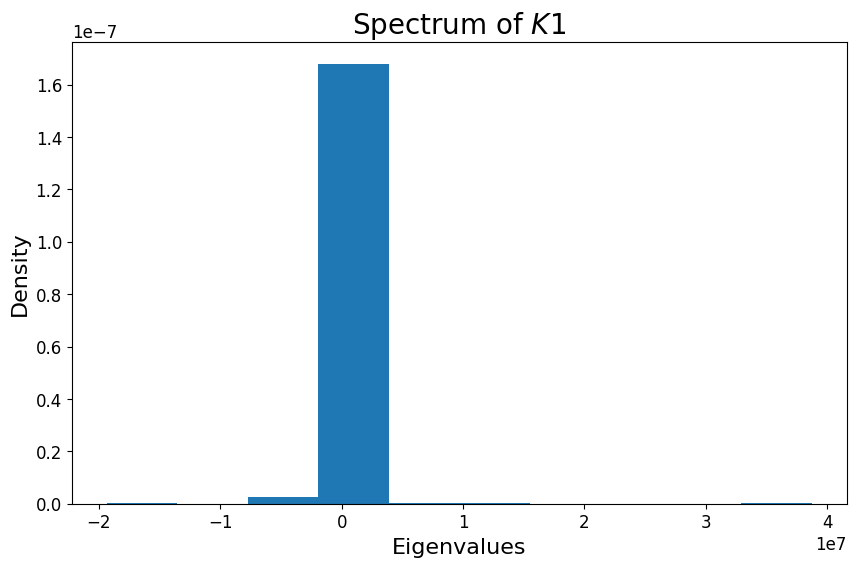

In [8]:
eigen = linalg.eigh(K1)
eigenvalues = eigen.eigenvalues
plt.figure(figsize=(10,6))
plt.hist(eigenvalues, density=True)
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Spectrum of $K1$')
plt.show()

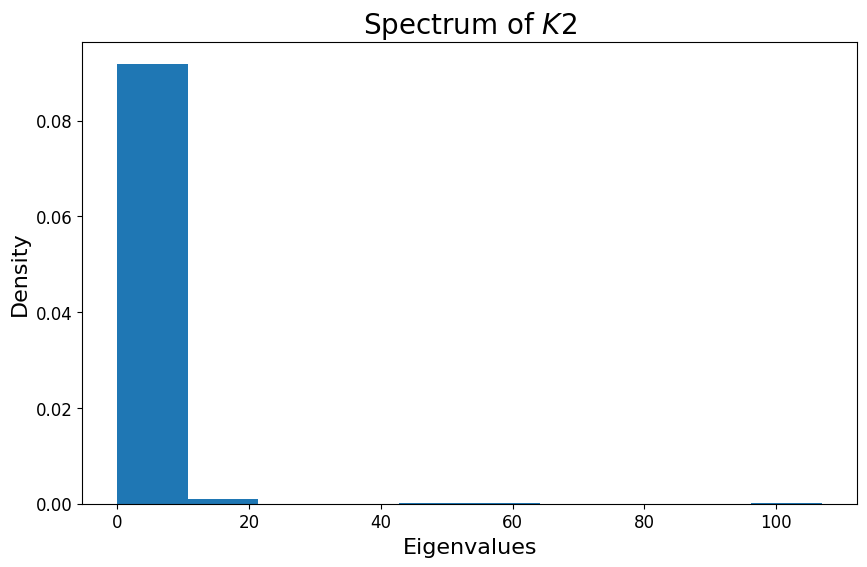

In [9]:
eigen = linalg.eigh(K2)
eigenvalues = eigen.eigenvalues
plt.figure(figsize=(10,6))
plt.hist(eigenvalues, density=True)
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Spectrum of $K2$')
plt.show()

The eigenvalue spectrum plots above for both polynomial (K1) and radial (K2) kernels indicates the presence of large values. This indicates there are directions with large variance, i.e., signal is present in the data, so we have indeed computed correct kernels.

**3.2 - Kernel PCA projections (13 marks).** Write a function `pca_function_kernel` to compute the data projection onto the first $m$ non-linear components of Kernel PCA by completing the following skeleton code. The function should be able to work for any Gram kernel matrix specified via the `kernel` argument. [Hint: some lines can be the same as from the course's notebooks!]

In [10]:
def pca_function_kernel(X, m, kernel, alpha=1):
    """
    Compute the projection of input data using Kernel PCA.

    Parameters:
      X (np.ndarray): input array, shape (N, p).
      m (int): number of non-linear principal components.
      kernel (callable): function to be used as Gram kernel matrix.
      alpha (float): parameter of kernel function (e.g. n for polynomial, c for radial).
    Returns:
      projection (np.ndarray): data projection matrix, shape (N, m).
    """

    # matrix to diagonalise
    C = kernel(X, X, alpha) # <-- EDIT THIS LINE

    # Computing the eigenvalues and eigenvectors
    eigen = linalg.eigh(C) # <-- EDIT THIS LINE

    # extract the m top-ranking eigenvalues
    eigenvalues = eigen.eigenvalues[::-1][0:m] # <-- EDIT THIS LINE

    # avoid too small numerical values
    threshold = 1e-10
    eigenvalues[np.abs(eigenvalues) < threshold] = 1e-7

    # and the corresponding eigenvectors
    eigenvectors = eigen.eigenvectors[:, ::-1][:, 0:m] # <-- EDIT THIS LINE

    # obtain the data projection
    projection = (X.T).dot(eigenvectors) # <-- EDIT THIS LINE

    return projection

**(Continue 3.2)**

Compute the projection of the dataset `X_std` onto the first $m=2$ non-linear components using the polynomial kernel function with $n=3, 4$ and the radial kernel function with $c=5,10$ that you defined in **3.1**. Produce a scatter plot of the projection onto the first component against the projection onto the second, for each kernel type and each value of $n$ and $c$ (i.e., 4 plots), colouring each data point according to the `Treatment` label.

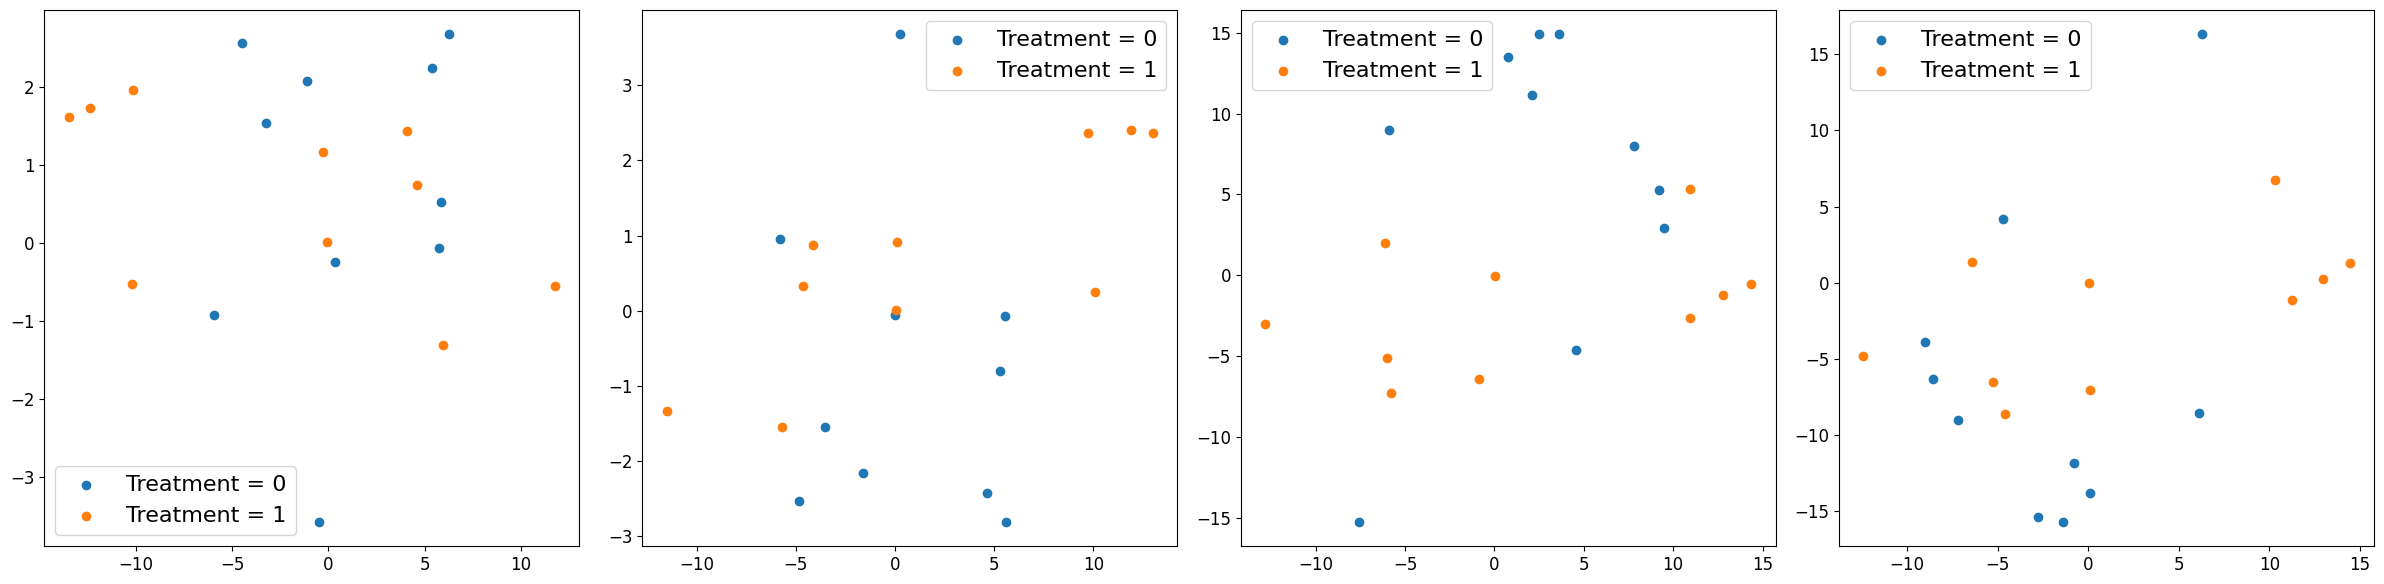

In [11]:
m = 2
proj11 = pca_function_kernel(X_std[treatment == 0], m, polynomial_kernel, alpha=3)
proj12 = pca_function_kernel(X_std[treatment == 1], m, polynomial_kernel, alpha=3)
proj21 = pca_function_kernel(X_std[treatment == 0], m, polynomial_kernel, alpha=4)
proj22 = pca_function_kernel(X_std[treatment == 1], m, polynomial_kernel, alpha=4)
proj31 = pca_function_kernel(X_std[treatment == 0], m, radial_kernel, alpha=5)
proj32 = pca_function_kernel(X_std[treatment == 1], m, radial_kernel, alpha=5)
proj41 = pca_function_kernel(X_std[treatment == 0], m, radial_kernel, alpha=10)
proj42 = pca_function_kernel(X_std[treatment == 1], m, radial_kernel, alpha=10)
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
axs[0].scatter(proj11[:, 0], proj11[:, 1], label='Treatment = 0')
axs[0].scatter(proj12[:, 0], proj12[:, 1], label='Treatment = 1')
axs[0].legend()
axs[1].scatter(proj21[:, 0], proj21[:, 1], label='Treatment = 0')
axs[1].scatter(proj22[:, 0], proj22[:, 1], label='Treatment = 1')
axs[1].legend()
axs[2].scatter(proj31[:, 0], proj31[:, 1], label='Treatment = 0')
axs[2].scatter(proj32[:, 0], proj32[:, 1], label='Treatment = 1')
axs[2].legend()
axs[3].scatter(proj41[:, 0], proj41[:, 1], label='Treatment = 0')
axs[3].scatter(proj42[:, 0], proj42[:, 1], label='Treatment = 1')
axs[3].legend()
plt.tight_layout()
plt.show()

<a name="task-4"></a>
# Task 4 (25 marks): Logistic Regression ([index](#outline))

In this task you will assess the extent to which the lower-dimensional PCA projection reflects the partition into the two `Treatment` classes, comparing kernel PCA to standard linear PCA.

**4.1 - Linear PCA (5 marks).** Using code from the Week 8 notebook, perform linear PCA on the dataset `X_std` to obtain the data projections onto the first $m=2$ principal components. Produce a scatter plot of these projections, like in **3.2**, colouring each data point according to the `Treatment` label.


In [12]:
## EDIT HERE
def covariance_matrix(X):
    """
    Parameters:
      X (np.ndarray): Samples matrix, shape (N, p).

    Returns:
     The covariance matrix, shape (p, p).

    """
    return np.dot(X.T, X) / len(X) # <-- SOLUTION


def pca_function(X, m):
    """
    Parameters:
      X (np.ndarray): Samples matrix, shape (N, p).
      m (int): Number of principal components (m<=p).

    Returns:
      X_pca (np.ndarray): Projected data, shape (N, m).
      eigenvectors (np.ndarray): First m eigenvectors of C, shape (N, m).
      eigenvalues (np.ndarray): First m eigenvalues of C, shape (m, ).

    """
    # Computing the covariance matrix
    C = covariance_matrix(X)

    # Computing the eigendecomposition using the linalg.eigh function
    eigen = linalg.eigh(C) # <-- SOLUTION
    # extract the m largest eigenvalues
    eigenvalues = eigen.eigenvalues[::-1][0:m] # <-- SOLUTION
    # we need to account for numerical error in calculating the eigenvalues
    threshold = 1e-10 # <-- SOLUTION
    eigenvalues[np.abs(eigenvalues) < threshold] = 0 # or a small value 1e-7
    # and their corresponding eigenvectors
    eigenvectors = eigen.eigenvectors[:, ::-1][:, 0:m] # <-- SOLUTION

    # Project the data onto the directions of eigenvectors
    X_pca = X.dot(eigenvectors) # <-- SOLUTION

    return X_pca, eigenvectors, eigenvalues

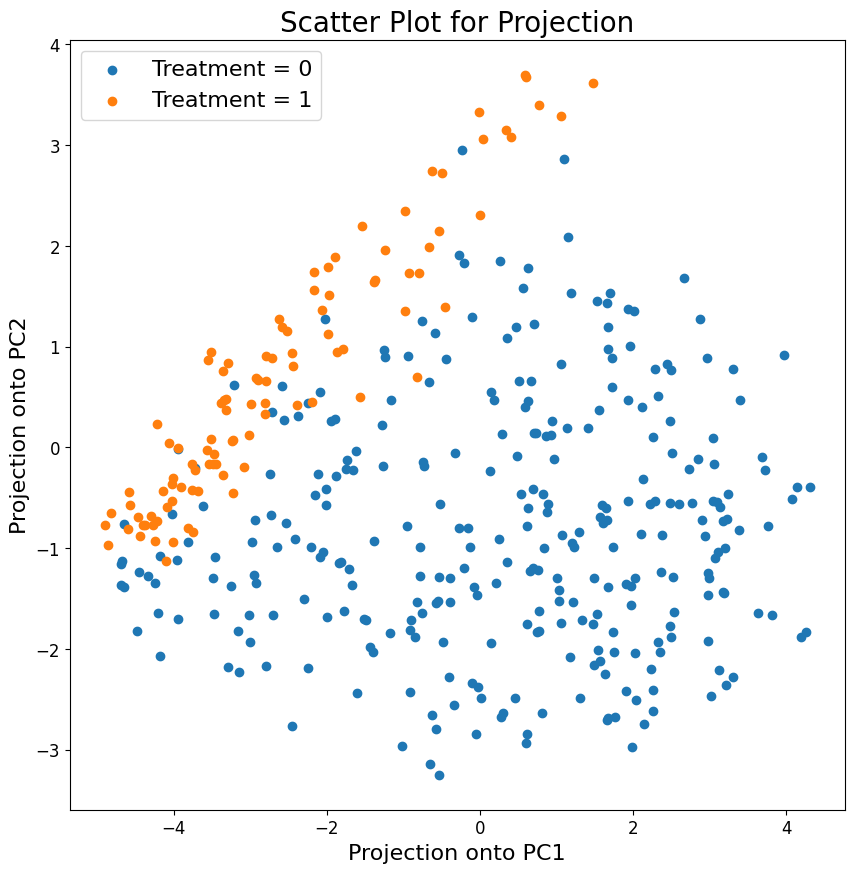

In [13]:
m = 2
projl1, _, _ = pca_function(X_std[treatment == 0], m)
projl2, _, _ = pca_function(X_std[treatment == 1], m)
plt.figure(figsize=(10,10))
plt.scatter(projl1[:, 0], projl1[:, 1], label = 'Treatment = 0')
plt.scatter(projl2[:, 0], projl2[:, 1], label = 'Treatment = 1')
plt.legend()
plt.xlabel('Projection onto PC1')
plt.ylabel('Projection onto PC2')
plt.title('Scatter Plot for Projection')
plt.show()

**4.2 - Logistic Regression on linear PCA (15 marks).**

**4.2.1** Taking code from the logistic regression notebook (Week 2), train a logistic regression classifier using as training set the projections of the *entire* dataset `X_std` on the first $m=2$ principal components of linear PCA from **4.1**. [Hint: the training set has then size $400\times2$]. Report the accuracy on the training set (as is computed inside the function `model` from the logistic regression notebook), commenting on your result.

**Note:** If you see a `RuntimeWarning` message during training, fix it using one of the strategies we have seen during the course to avoid computing numerically the logarithm of zero.


The strategy is to add a small but non-zero value to each entry of the matrix so that we are avoiding taking logarithm of zero.

In [14]:
proj, _, _ = pca_function(X_std, m)
proj += np.ones((400,2)) * 0.00001
proj.shape

(400, 2)

In [15]:
## EDIT THIS FUNCTION
def logistic(z):
    return 1. / (1. + np.exp(-z))  ## <-- SOLUTION

## EDIT THIS FUNCTION
def predict_log(X, beta):
    assert X.shape[1] == beta.shape[0] # expect X to have same number of columns as beta
    y_log = logistic(X @ beta)  ## <-- SOLUTION
    return y_log.squeeze()

def initialise(size):
    """
    Argument:
    size: Size of the parameter vector beta

    Returns:
    beta: Initialised vector of shape (size, 1)

    """

    beta = np.zeros((size, 1))

    return beta

## EDIT THIS FUNCTION
def propagate(X, y, beta):
    """
    This function computes the mean sample loss and its gradient.

    Arguments:
    X: Data of shape (N, p+1)
    y: True label vector of size N
    beta: Parameter vector, a numpy array of size p+1

    Returns:
    mean_loss: Mean sample loss for the negative log-likelihood
    dbeta: Gradient of the mean sample loss with respect to beta

    """

    y_log = predict_log(X, beta)

    assert y_log.shape == y.shape

    # Mean sample loss function
    mean_loss = - np.mean(y * np.log(y_log) + (1-y) * np.log(1 - y_log)) ## <-- SOLUTION

    # Derivatives
    dbeta = np.mean(X.T * (y_log - y), axis=1).reshape(-1, 1) ## <-- SOLUTION

    mean_loss = np.squeeze(mean_loss)

    # Store gradients in a dictionary
    grads = {'dbeta': dbeta}

    return grads, mean_loss

## EDIT THIS FUNCTION
def optimise(X, y, beta, num_iterations=1000, learning_rate=0.1, print_loss=False):
    """
    This function implements gradient descent to learn the parameters of the logistic regression model.

    Arguments:
    X: Data of shape (N, p+1)
    y: True label vector of size N
    beta: Parameter vector, a numpy array of size p+1
    num_iterations: Number of iterations
    learning_rate: Step size in updating procedure
    print_loss: 'True' to print the mean loss every 100 iterations

    Returns:
    params: Dictionary containing the parameter vector beta
    grads: Dictionary containing the gradient
    mean_loss_history: List of all the mean loss values computed during the optimisation (can be used to plot the learning curve)

    """
    mean_loss_history = []

    for i in range(num_iterations):

        # Calculating the loss and gradients (hint: use your existing functions)
        grads, mean_loss = propagate(X, y, beta)  ## <-- SOLUTION

        # Retrieving derivatives from grads
        dbeta = grads['dbeta']

        # Updating procedure
        beta = beta - learning_rate * dbeta  ## <-- SOLUTION

        # Record the loss values
        if i % 100 == 0:
            mean_loss_history.append(mean_loss)

        # Printing the loss every 100 iterations
        if print_loss and i % 100 == 0:
            print ('Mean loss after iteration %i: %f' %(i, mean_loss))

    # Saving parameters and gradients in dictionary
    params = {'beta': beta}
    grads = {'dbeta': dbeta}

    return params, grads, mean_loss_history

## EDIT THIS FUNCTION
def predict(X_test, beta):
    """
    This function predicts the labels for the test set.

    Arguments:
    X_test: Test set of shape (N_test, p+1)
    beta: Parameter vector, a numpy array of size p+1

    Returns:
    y_pred: Vector containing all probabilities of class 1 for X_test

    """

    assert X_test.shape[1] == beta.shape[0]

    N_test = X_test.shape[0]
    y_pred = np.zeros((N_test, 1))
    beta = beta.reshape(X_test.shape[1], 1)

    # Predicting the probabilities
    y_log = predict_log(X_test, beta)

    y_pred = y_log.squeeze() # <-- SOLUTION

    return y_pred

def model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.1, print_loss=False):
    """
    This function implements the logistic regression model, starting with initialisation,
    then optimisation and finally evaluations on training and testing data.

    Arguments:
    X_train: Training set of shape (N_train, p+1)
    y_train: True label vector of size N_train
    X_test: Test set of shape (N_test, p+1)
    y_test: True label vector of size N_test
    num_iterations: Number of iterations
    learning_rate: Step size in updating procedure
    print_loss: 'True' to print the mean loss every 100 iterations

    Returns:
    d: Dictionary containing all the information (mean loss history, y_pred_test, y_pred_train, beta, learning_rate, num_iterations)

    """

    # Initialising parameters with zeros
    beta = initialise(X_train.shape[1])

    # Gradient descent
    parameters, grads, mean_loss_history = optimise(X_train, y_train, beta, num_iterations, learning_rate, print_loss=print_loss)

    # Retrieving parameter vector beta from dictionary 'parameters'
    beta = parameters['beta']

    # Predicting test and training set examples
    y_pred_test = predict(X_test, beta)
    y_pred_train = predict(X_train, beta)

    # Printing train/test accuracy
    print('Training accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('Test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    # Saving all the information
    d = {'mean_loss_history': mean_loss_history, 'y_pred_test': y_pred_test, 'y_pred_train': y_pred_train, 'beta': beta, 'learning_rate': learning_rate, 'num_iterations': num_iterations}

    return d

def model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.1, print_loss=False):
    """
    This function implements the logistic regression model, starting with initialisation,
    then optimisation and finally evaluations on training and testing data.

    Arguments:
    X_train: Training set of shape (N_train, p+1)
    y_train: True label vector of size N_train
    X_test: Test set of shape (N_test, p+1)
    y_test: True label vector of size N_test
    num_iterations: Number of iterations
    learning_rate: Step size in updating procedure
    print_loss: 'True' to print the mean loss every 100 iterations

    Returns:
    d: Dictionary containing all the information (mean loss history, y_pred_test, y_pred_train, beta, learning_rate, num_iterations)

    """

    # Initialising parameters with zeros
    beta = initialise(X_train.shape[1])

    # Gradient descent
    parameters, grads, mean_loss_history = optimise(X_train, y_train, beta, num_iterations, learning_rate, print_loss=print_loss)

    # Retrieving parameter vector beta from dictionary 'parameters'
    beta = parameters['beta']

    # Predicting test and training set examples
    y_pred_test = predict(X_test, beta)
    y_pred_train = predict(X_train, beta)

    # Printing train/test accuracy
    print('Training accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('Test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    # Saving all the information
    d = {'mean_loss_history': mean_loss_history, 'y_pred_test': y_pred_test, 'y_pred_train': y_pred_train, 'beta': beta, 'learning_rate': learning_rate, 'num_iterations': num_iterations}

    return d

Mean loss after iteration 0: 0.693147
Mean loss after iteration 100: 0.389534
Mean loss after iteration 200: 0.387958
Mean loss after iteration 300: 0.387883
Mean loss after iteration 400: 0.387878
Training accuracy: 74.81438996603946 %
Test accuracy: 74.81438996603946 %


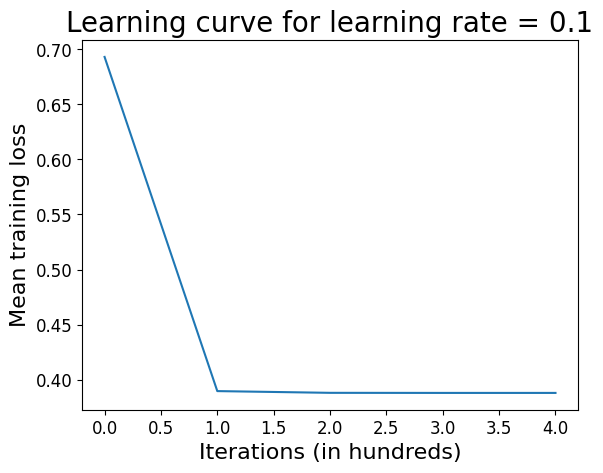

In [16]:
d = model(proj, treatment, proj, treatment, num_iterations=500, learning_rate=0.1, print_loss=True)
loss_history = np.squeeze(d['mean_loss_history'])
plt.ylabel('Mean training loss')
plt.xlabel('Iterations (in hundreds)')
plt.title('Learning curve for learning rate = ' + str(d['learning_rate']))
plt.plot(loss_history);

We can see that the mean loss converged quickly, and the accuracy on the training set is around 74.81%, which is a reasonably good result.

**4.2.2** Discretise the predictions of the classifier from **4.2.1**, using 3 different classification thresholds: $\tau=0.5$, $\tau=0.6$, $\tau=0.7$. For each value of $\tau$: compute and report the precision on the training set; draw the classifier's decision boundary on the plot that you produced in **4.1** of the PCA data projections. Discuss your results.


[-0.75152039 -1.10239297]


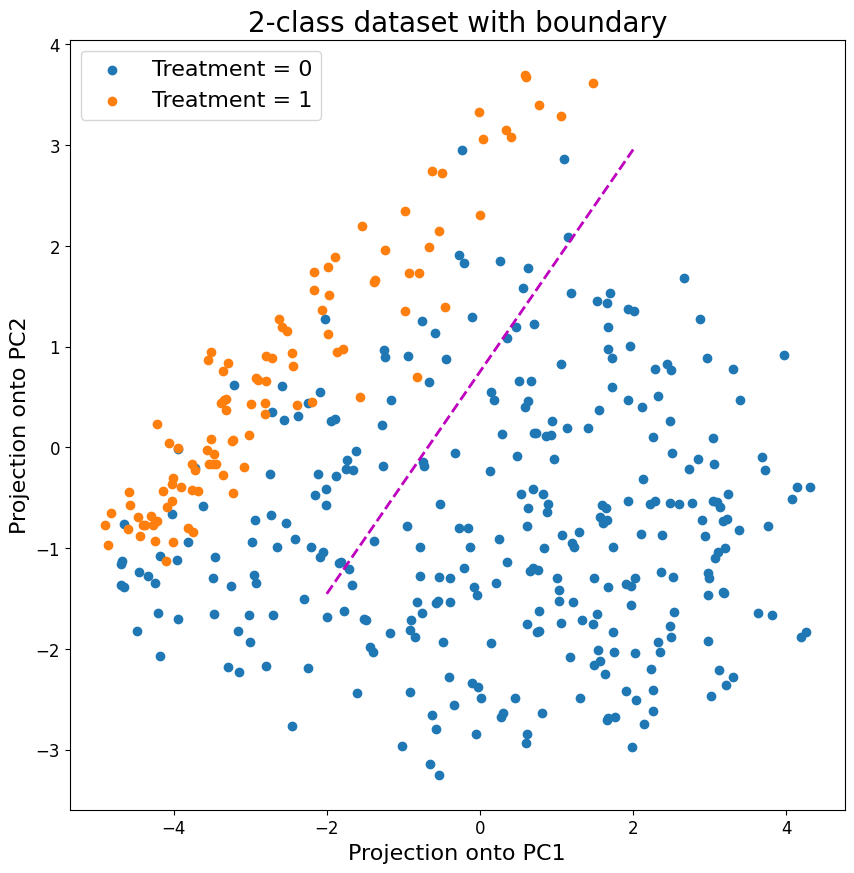

In [17]:
beta = np.squeeze(d['beta'])
print(beta)
x1 = np.asarray([-2,2])
m = -beta[1]
c = -beta[0]
x2 = m*x1 + c
projl1, _, _ = pca_function(X_std[treatment == 0], 2)
projl2, _, _ = pca_function(X_std[treatment == 1], 2)
plt.figure(figsize=(10,10))
plt.scatter(projl1[:, 0], projl1[:, 1], label = 'Treatment = 0')
plt.scatter(projl2[:, 0], projl2[:, 1], label = 'Treatment = 1')
plt.plot(x1, x2, 'm--', lw=2)
plt.xlabel('Projection onto PC1')
plt.ylabel('Projection onto PC2')
plt.title('2-class dataset with boundary')
plt.legend()
plt.show()

We can see from the plot that while the decision boundary does separate the two classes, its bias is a bit too high (the intercept is too small) and so is not quite optimal.

**4.3 - Logistic Regression on kernel PCA (5 marks).** Repeat subtask **4.2.1** using as training set the projections of the *entire* dataset `X_std` on the first $m=2$ principal components of kernel PCA from **3.2**, both for the polynomial kernel with $n=3$ and the radial kernel with $c=5$. Discuss your results.

[Note: If you did not obtain a usable output from **3.1** and **3.2**, use the default output of our skeleton functions].


<a name="task-5"></a>
# Task 5 (20 marks): Hierarchical clustering ([index](#outline))

In this task you will perform hard clustering of the samples in `X_std` via Hierarchical Clustering (HC), comparing two linkage choices.

**5.1 - Hard clustering with HC (14 marks).** Using code from Week 7 notebooks, apply HC to cluster the samples in `X_std` using: the Euclidean distance as your pairwise distance metric $D(\mathbf{x}^{(i)}, \mathbf{x}^{(j)})$ between samples $\mathbf{x}^{(i)}$ and $\mathbf{x}^{(j)}$; *complete* linkage.

Let's recall that, in clustering, the between-cluster distance $B(C)$ is defined as:
$$
B(C) = \frac{1}{2} \sum_{k=1}^K \sum_{i \in  c_k}\sum_{j  \notin c_k} D(\mathbf{x}^{(i)}, \mathbf{x}^{(j)})
$$
where $D(\mathbf{x}^{(i)}, \mathbf{x}^{(j)})$, as above, is the pairwise distance between samples used, $K$ is the number of clusters $c_k$ at a certain tree level.

Plot $B(C)$ as a function of the tree levels and use the shape of this plot to determine an optimal number of clusters, justifying your answer.

In [18]:
## EDIT THIS FUNCTION
def pairwise_distances(X):
    '''
    Parameters:
        X (np.ndarray): Samples matrix, shape (N, p).
    Returns:
        distance (np.ndarray): Distance matrix, shape (N, N).
    '''
    N, _ = X.shape
    distance = np.zeros((N, N))

    for i in range(N):
        for j in range(i + 1, N):
            d = np.sqrt(np.sum((X[i, :] - X[j,])**2))
            distance[i, j] = d
            distance[j, i] = d

    return distance

def linkage(distances, labels, i, j, linkage_type):
    """
    This function computes a matrix of distances between the samples of two clusters

    Parameters:
      distances (np.ndarray): Distance matrix, shape (N, N).
      labels (np.ndarray): Cluster index of each sample, shape (N,).
      i (int): The index of the first cluster.
      j (int): The index of the second cluster.
      linkage_type (string): The linkage type to be used,
                             either 'single' or 'average'.
    Returns:
      pairs_distance (np.ndarray): Distance matrix, shape (|c_i|, |c_j|).

    """
    # Select the indices of the first cluster.
    points_i = np.argwhere(labels == i) ## <-- SOLUTION
    # Select the point indices of the second cluster.
    points_j = np.argwhere(labels == j) ## <-- SOLUTION
    # Form a cartesian product between the indices in i and indices in j.
    pairs = np.array([[element_i.item(), element_j.item()]  for element_i in points_i for element_j in points_j])
    # Select the pair distances between the points in the two clusters from the distances matrix.
    pairs_distance = distances[pairs[:, 0], pairs[:, 1]]

    linkage_map = {
    'single': lambda x: x.min(),
    'average': lambda x: x.mean()
    } ## <- SOLUTION

    return linkage_map[linkage_type](pairs_distance)

class Pair:
    """
    A pair of clusters.
    """
    def __init__(self, i: int, j: int, distance: float):
        """
        Args:
            i (int): The index of the first cluster.
            j (int): The index of the second cluster.
            distance (float): The distance between the two clusters.
        """
        self.i = i
        self.j = j
        self.distance = distance

    def __lt__(self, other):
        """
        Compare two pairs of clusters based on their distance.
        less-than definition.
        Args:
            other (Pair): The other pair of clusters.
        Returns:
            bool: True if this pair is less than the other pair.
        """
        return self.distance < other.distance

    def __repr__(self):
        """string representation"""
        return f'({self.i}, {self.j}, {self.distance})'

def hierarchical_clustering(X, distances, linkage_type):
    """
    The agglomerative hierarchical clustering algorithm start with every point as a single
    cluster and each iteration merges two clusters into one. We store all the
    intermediate clustering results with respect to the number of clusters left.

    Parameters:
      X (np.ndarray): Samples matrix, shape (N, p).
      distances (np.ndarray): Distance matrix, shape (N, N).
      linkage_type (string): The linkage type to be used, either 'single', or 'average'.

    Returns:
     labels (np.ndarray):  Cluster labels at each level, shape (N, N).
          Element (i, j) denotes the cluster label of sample i at level j.
    """

    N, D = X.shape
    labels = np.zeros((N, N))

    # Begin with every point in its own cluster
    current_labels = np.arange(N)   # <-- SOLUTION

    # The id to be assigned for the next merged cluster
    next_cluster_id = N

    priority_queue = []
    # Initialise Priority Queue
    for i in range(N):
        for j in range(i + 1, N):
            priority_queue.append(Pair(i, j, distances[i, j]))
    heapify(priority_queue)

    labels[N - 1] = current_labels # the leaves
    # Begin from level (N - 1) to level 1
    for level in tqdm(range(N - 2, 0, -1)):
        # pop and return the smallest item in priority queue
        # i.e. the pair (i, j) of clusters which are closest together
        next_pair = heappop(priority_queue)

        # Remove pair of clusters in the queue which have i and j in them i.e. (i, j) or (j, i)
        priority_queue = [p for p in priority_queue if next_pair.i not in (p.i, p.j) and next_pair.j not in (p.i, p.j)]

        # re sort the queue
        heapify(priority_queue)

        # Merge all samples which currently belong to cluster i or j
        current_labels[(current_labels == next_pair.i) | (current_labels == next_pair.j)] = next_cluster_id

        # Compute the merging cost of the new cluster with all existing clusters to the queue
        for i in set(p.i for p in priority_queue) | set(p.j for p in priority_queue):
            d = linkage(distances, current_labels, i, next_cluster_id, linkage_type) ## <- SOLUTION
            heappush(priority_queue, Pair(i, next_cluster_id, d))

        next_cluster_id += 1
        # Store the current cluster assignment into the assignments array.
        labels[level, :] = current_labels ## <- SOLTUION

    # add the root labels
    labels[0, :] = next_cluster_id * np.ones(N)
    return labels

In [19]:
distance = pairwise_distances(X_std)/2
h_clustering_1 = hierarchical_clustering(X_std, distance, 'single')

100%|██████████| 398/398 [00:23<00:00, 16.98it/s]


I do not know how to plot B(C) so I will just use level = 5 for the number of clusters.

**(Continue 5.1)**

Produce a scatter plots of the first and third data features (i.e., `X_std[:,0]` against `X_std[:,2]`) colouring each data point according to its cluster assignment for the optimal number of clusters that you have just determined.

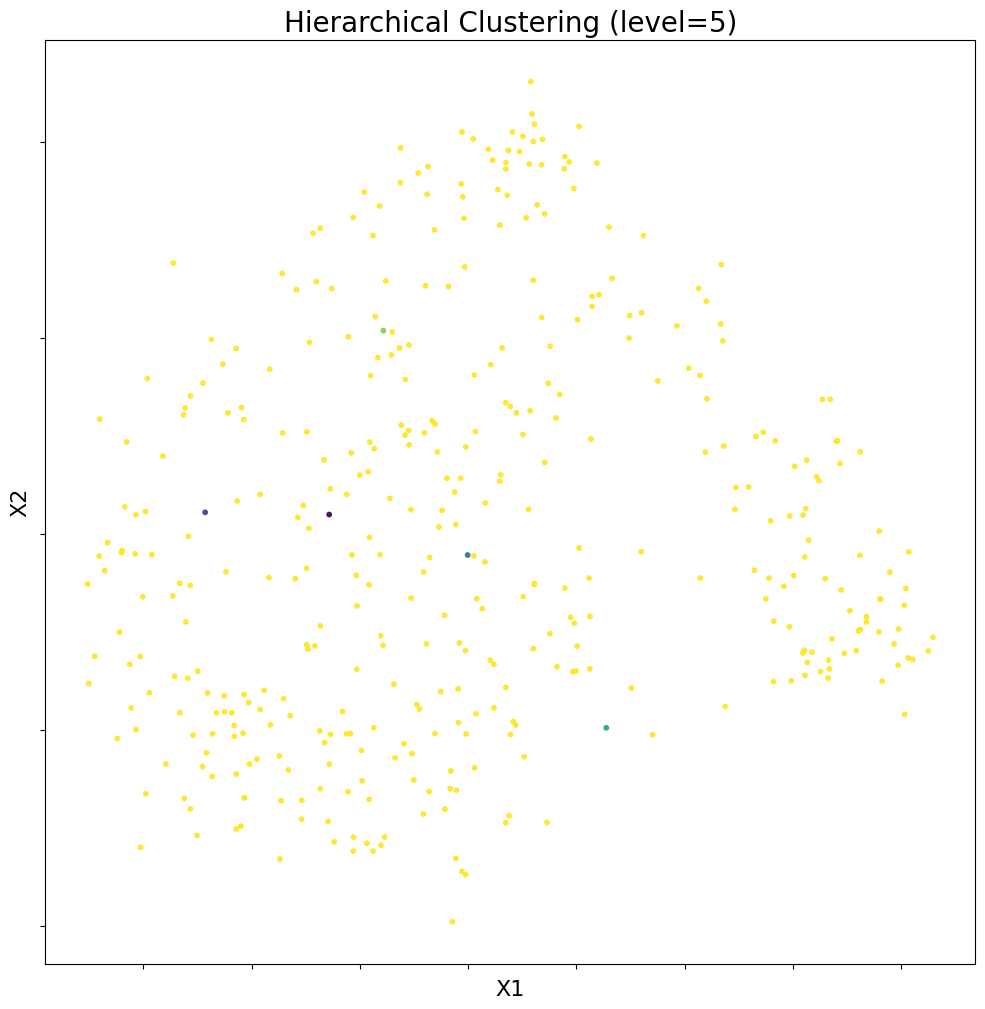

In [20]:
level = 5
level_vals = list(sorted(set(h_clustering_1[level])))
simple_labels = [level_vals.index(v) for v in h_clustering_1[level]]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(X_std[:, 0], X_std[:, 2],
           c=simple_labels, s=10, alpha = 0.9)
ax.set_title(f'Hierarchical Clustering (level={level})')
ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_xlabel('X1'); ax.set_ylabel('X2')
plt.show()

**5.2 - Linkage type comparison (6 marks).** Repeat task **5.1** with *average* linkage. Using code from the Week 9 notebook, compute and report the Normalised Variation of Information (NVI) between the clustering obtained here (with its optimal number of clusters) and the clustering obtained in **5.1** (with its optimal number of clusters). Discuss the comparison between *complete* and *average* linkage based on the NVI and the scatter plots you have produced.

In [21]:
h_clustering2 = hierarchical_clustering(X_std, distance, 'average')

100%|██████████| 398/398 [00:20<00:00, 18.98it/s] 


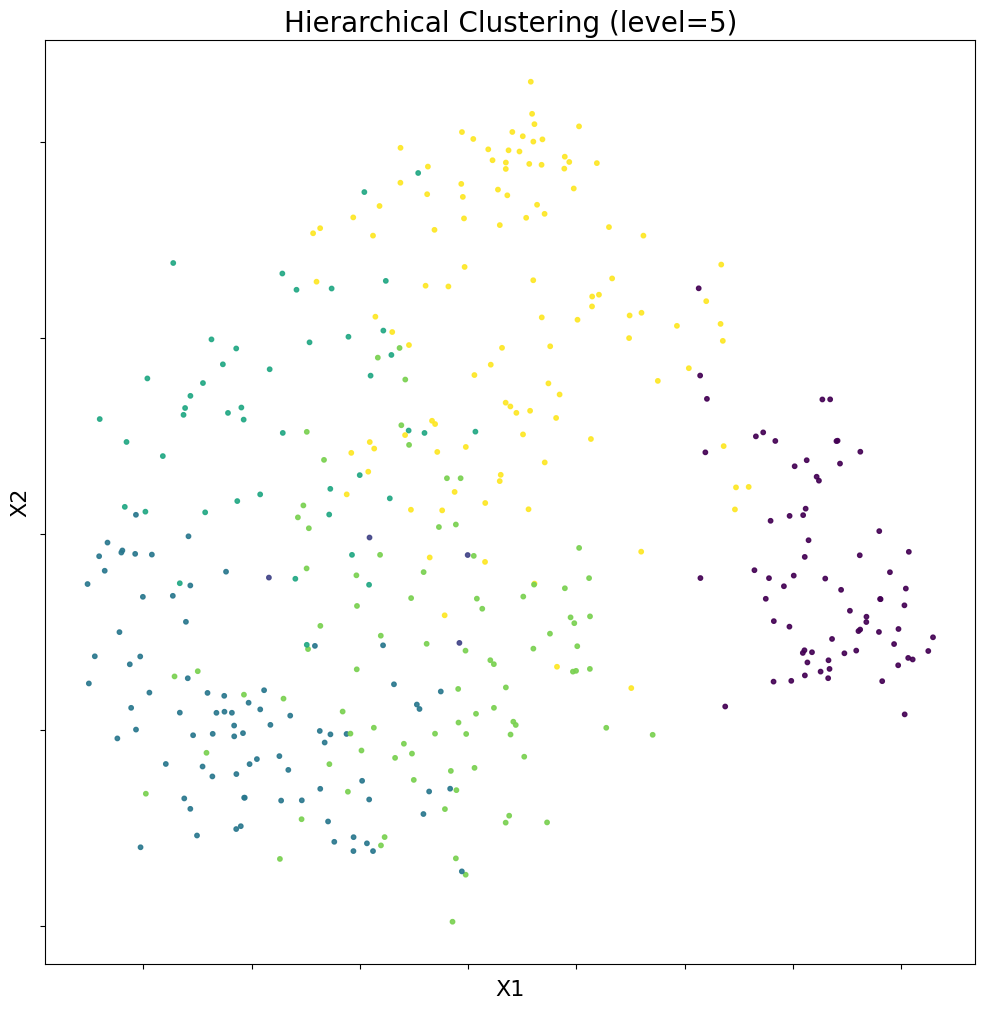

In [22]:
level = 5
level_vals = list(sorted(set(h_clustering2[level])))
simple_labels = [level_vals.index(v) for v in h_clustering2[level]]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(X_std[:, 0], X_std[:, 2],
           c=simple_labels, s=10, alpha = 0.9)
ax.set_title(f'Hierarchical Clustering (level={level})')
ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_xlabel('X1'); ax.set_ylabel('X2')
plt.show()

In [23]:
## EDIT THIS CELL

def compute_NVI(partition_1,partition_2):
    """Computes NVI of two partitions.

    Parameters:
        partition_1 (np.array): Encoding for partition 1.
        partition_2 (np.array): Encoding for partition 2.

    Returns:
        NVI (float): NVI of the two partitions.
    """
    # check if partitions are defined on the same underlying space
    assert len(partition_1) == len(partition_2), "Partition arrays must have same length"

    # get number of points
    N = len(partition_1)

    # get communities as sets from partition 1
    communities_1 = []
    for index in np.unique(partition_1):
        community = set(np.where(partition_1==index)[0])
        communities_1.append(community)

    # get communities as sets from partition 2
    communities_2 = []
    for index in np.unique(partition_2):
        community = set(np.where(partition_2==index)[0])
        communities_2.append(community)

    # compute number of communities
    n1 = len(communities_1)
    n2 = len(communities_2)

    # compute probabilities for the two partitions
    p1 = np.asarray([len(community) for community in communities_1]) / N        # <-- SOLUTION
    p2 = np.asarray([len(community) for community in communities_2]) / N        # <-- SOLUTION

    # compute joint probabilities
    p12 = np.zeros((n1,n2))
    for i in range(n1):
        for j in range(n2):
            p12[i,j] = len(communities_1[i].intersection(communities_2[j]))/N   # <-- SOLUTION

    # compute entropy
    H1 = - np.sum(p1 * np.log(p1))  # <-- SOLUTION
    H2 = - np.sum(p2 * np.log(p2))  # <-- SOLUTION

    # compute mutual information
    MI = 0
    for i in range(n1):
        for j in range(n2):
            if p12[i,j] > 0:
                MI += p12[i,j] * np.log(p12[i,j]/(p1[i]*p2[j])) # <-- SOLUTION

    # compute NVI
    NVI = (H1 + H2 - 2 * MI) / (H1 + H2 - MI)   # <-- SOLUTION

    return NVI

In [24]:
print(compute_NVI(X_std[treatment == 0], X_std[treatment == 1]))

AssertionError: Partition arrays must have same length

The Normalised Variation of Information (NVI) between the clustering obtained here is calculated to be